In [1]:
#导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics,svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [2]:
#设置配色
colors = ["#8AC6D1","#FEE9b2","#BBDED6","#FAE3D9","#FFB6B9","#FBD1B7","#F9FCE1","#D3F6F3","#C6F1D6","#E0F5B9","#FFBA92","#FF8080","#FDDEDE","#F5FEC0","#CAF2D7","#60A9A6"]

## 读入数据

In [3]:
#读取数据
data=pd.read_csv('D:/edge/pokemon/Pokemon.csv')
data=data.drop('#',axis=1)#去掉编号
#查看数据前五列
data.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#数据概况
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
data.isnull().sum()#查看数据缺失情况

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## 描述性统计

### 1. 总体概况

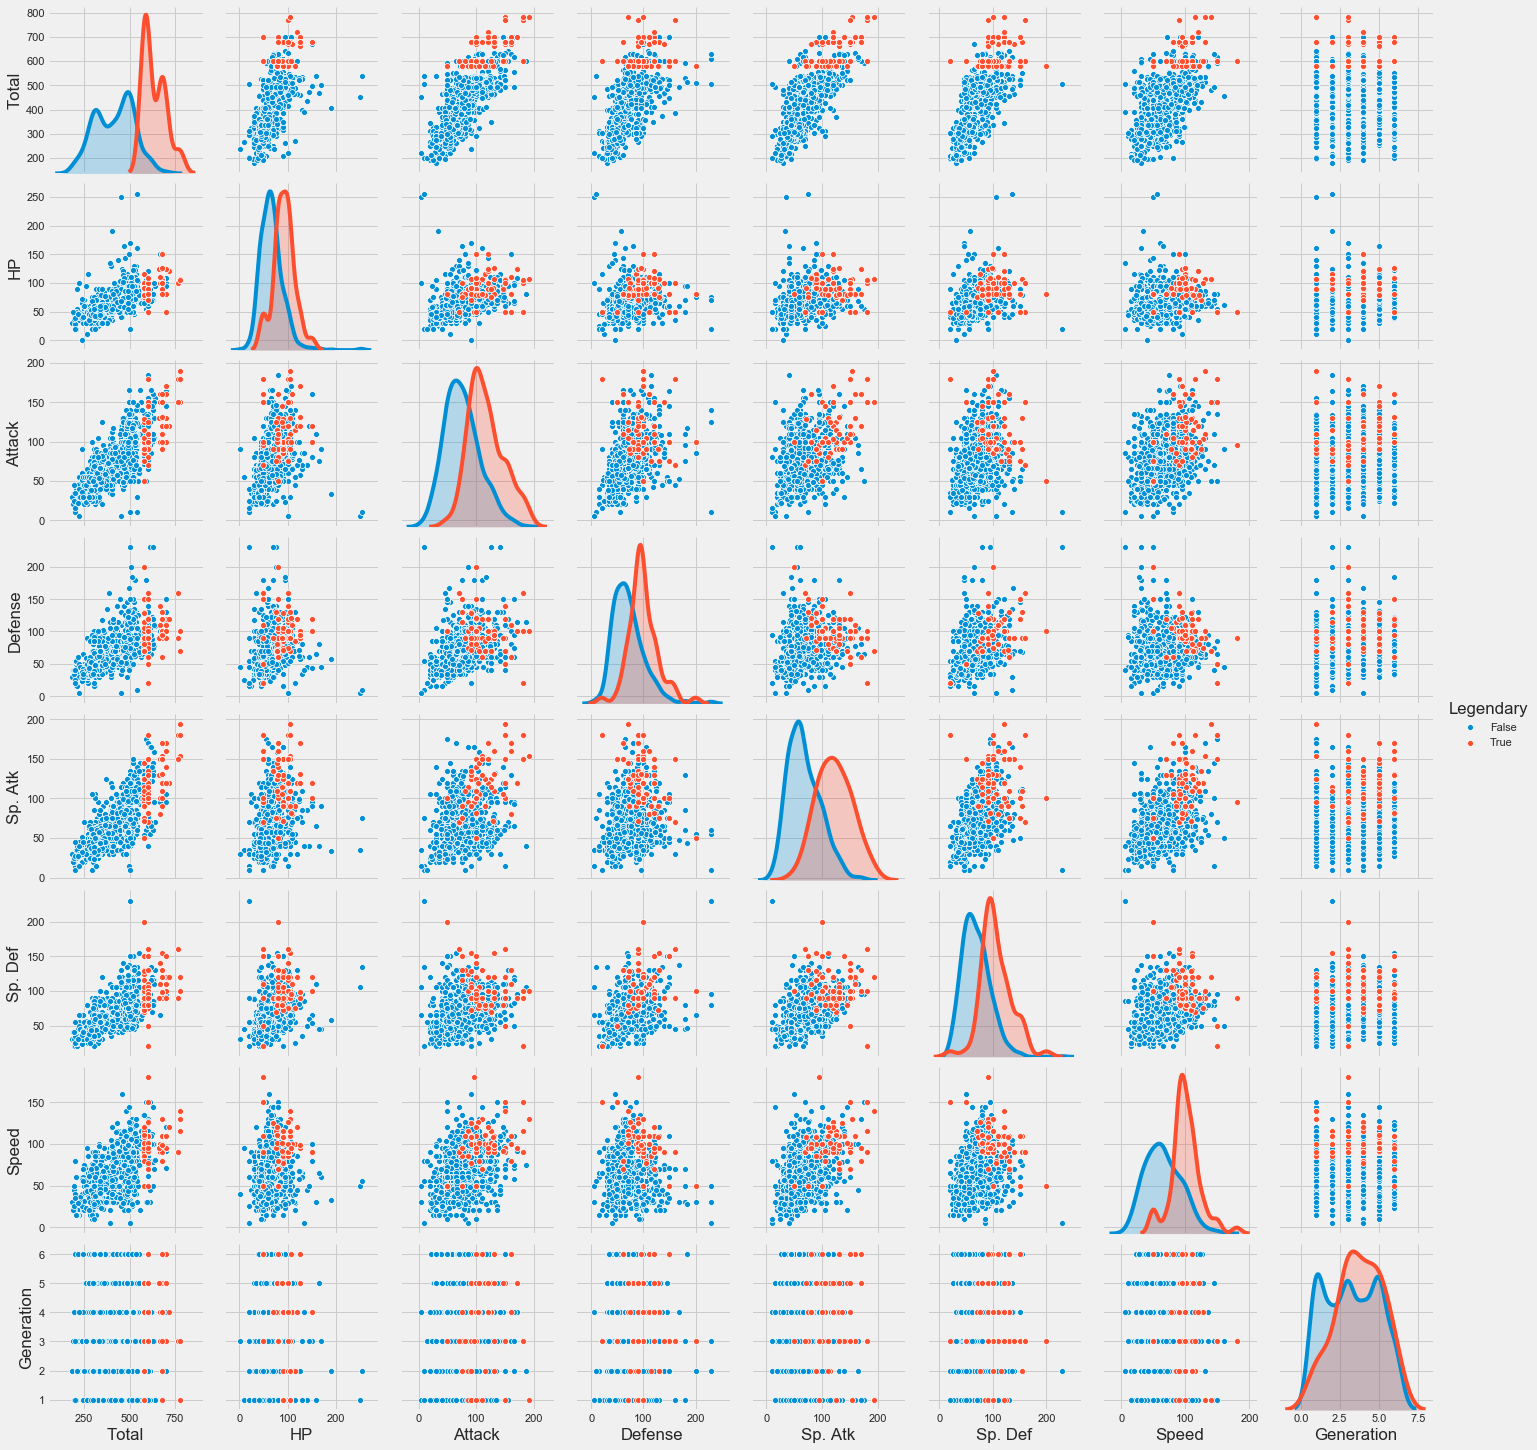

In [6]:
#pairplot
sns.pairplot(data, hue = 'Legendary')

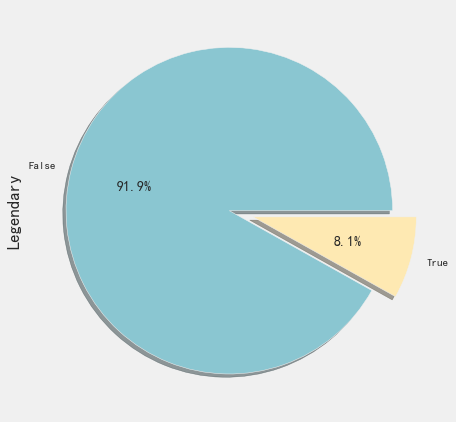

In [7]:
#宝可梦是否为传说宝可梦 占比饼图
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.subplots(1,1,figsize=(7,7))
data['Legendary'].value_counts().plot.pie(shadow=True,explode=[0,0.15],autopct='%1.1f%%',colors=colors)
plt.show()

### 2. 相关性分析

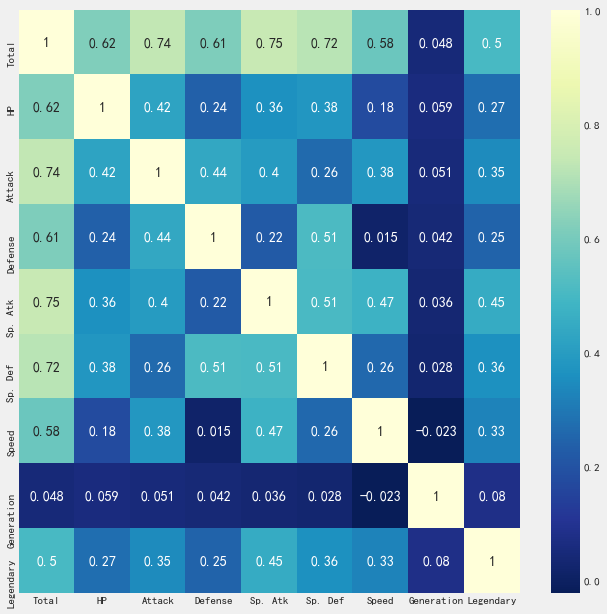

In [8]:
plt.figure(figsize=(10,10))
data['Legendary']=data['Legendary'].map({False:0,True:1})
sns.heatmap(data.corr(),annot=True,cmap = "YlGnBu_r")

### 3. 可视化

In [9]:
#连续变量 各属性雷达图
feature=list(data.columns)[4:-2]
data_lengendary=data[data['Legendary']==True]
data_normal=data[data['Legendary']==False]
lengendary_rada=[np.mean(data_lengendary['HP']),np.mean(data_lengendary['Attack']),np.mean(data_lengendary['Defense']),np.mean(data_lengendary['Sp. Atk']),np.mean(data_lengendary['Sp. Def']),np.mean(data_lengendary['Speed'])]
normal_rada=[np.mean(data_normal['HP']),np.mean(data_normal['Attack']),np.mean(data_normal['Defense']),np.mean(data_normal['Sp. Atk']),np.mean(data_normal['Sp. Def']),np.mean(data_normal['Speed'])]
rada_data=[lengendary_rada,normal_rada]
for i in range(6):
    rada_data[0][i]=round(rada_data[0][i],2)
    rada_data[1][i]=round(rada_data[1][i],2)

radar = (Radar()
         .add_schema(schema=[
             opts.RadarIndicatorItem(name="HP", max_=np.max(data_lengendary['HP'])),
             opts.RadarIndicatorItem(name="Attack", max_=np.max(data_lengendary['Attack'])),
             opts.RadarIndicatorItem(name="Defense", max_=np.max(data_lengendary['Defense'])),
             opts.RadarIndicatorItem(name="Sp. Atk", max_=np.max(data_lengendary['Sp. Atk'])),
             opts.RadarIndicatorItem(name="Sp. Def", max_=np.max(data_lengendary['Sp. Def'])),
             opts.RadarIndicatorItem(name="Speed", max_=np.max(data_lengendary['Speed']))
         ]
)
    .add('', rada_data)
)
radar.render_notebook()

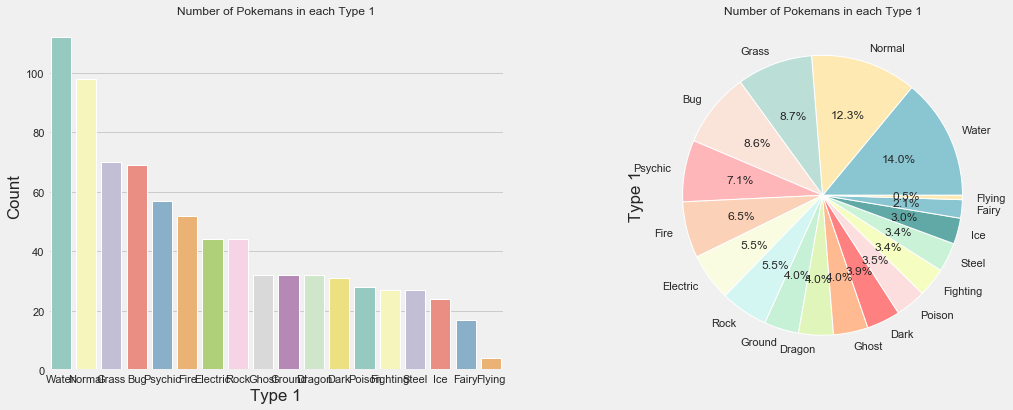

In [10]:
#分类变量 type1分布图
f,ax=plt.subplots(1,2,figsize=(16,6))
tmp = data.groupby('Type 1')['Name'].count()
tmp = pd.DataFrame(tmp)
tmp = tmp.reset_index()
tmp.columns = ['Type 1', 'Count']
tmp = tmp.sort_values('Count', ascending = False)
sns.set(style = 'whitegrid')
ax[0].set_title("Number of Pokemans in each Type 1")
ax[1].set_title("Number of Pokemans in each Type 1")
sns.barplot(ax=ax[0],x = "Type 1", y = "Count",palette="Set3", data = tmp)

data['Type 1'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',colors=colors)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

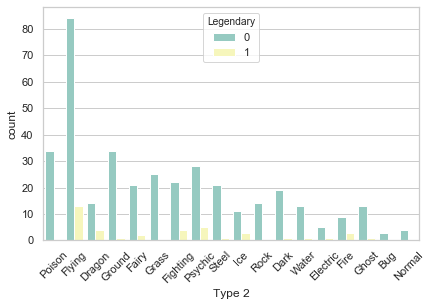

In [11]:
sns.countplot('Type 2',hue='Legendary',data=data,palette="Set3")
plt.xticks(rotation = 45)

In [12]:
#序数变量 generation
pd.crosstab(data.Generation,data.Legendary,margins=True).style.background_gradient(cmap='Blues')

Legendary,0,1,All
Generation,,,
1,160,6,166
2,101,5,106
3,142,18,160
4,108,13,121
5,150,15,165
6,74,8,82
All,735,65,800


第三代神兽比例:  0.11
第四代神兽比例:  0.11
第五代神兽比例:  0.09
第六代神兽比例:  0.1


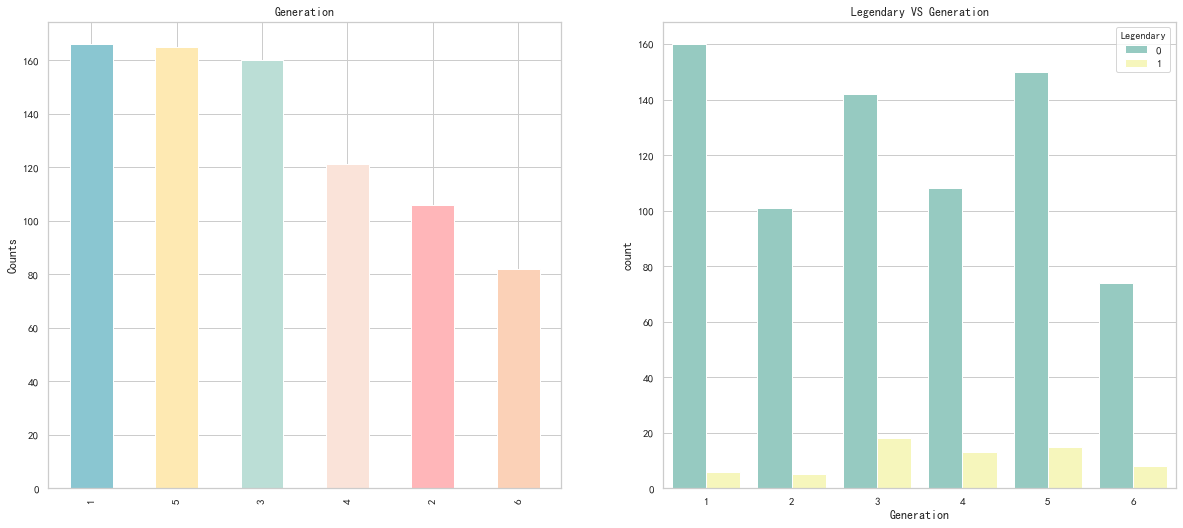

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Generation'].value_counts().plot.bar(ax=ax[0],color=colors)
ax[0].set_ylabel('Counts')
ax[0].set_title('Generation')
sns.countplot('Generation',hue='Legendary',data=data,ax=ax[1],palette="Set3")
ax[1].set_title('Legendary VS Generation')
print("第三代神兽比例: ", round(18/160,2))
print("第四代神兽比例: ", round(13/121,2))
print("第五代神兽比例: ", round(15/165,2))
print("第六代神兽比例: ", round(8/82,2))

## 数据清洗

In [14]:
data=data.drop('Name',axis=1)#去掉名字
data=data.drop('Total',axis=1)#去掉名字
data['Type 1'].replace(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire',
                        'Rock','Electric', 'Ground', 'Dragon', 'Ghost', 'Dark',
                        'Poison', 'Steel','Fighting', 'Ice', 'Fairy', 'Flying'],list(range(1,19)),inplace=True)
data.drop(['Type 2','HP'],axis=1,inplace=True)
data.head(5)

,Type 1,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,3,49,49,65,65,45,1,0
1,3,62,63,80,80,60,1,0
2,3,82,83,100,100,80,1,0
3,3,100,123,122,120,80,1,0
4,6,52,43,60,50,65,1,0


## 建立模型

In [15]:
#划分训练集和测试集
target='Legendary'
x_columns=[x for x in data.columns if x not in [target]]
X=data[x_columns]
Y=data['Legendary']
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((640, 7), (640,), (160, 7), (160,))

### 1. 逻辑回归

In [16]:
#逻辑回归
model = LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.9625


### 2. SVM

In [17]:
#线性SVM
model=svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction1,y_test))

Accuracy for linear SVM is 0.9625


In [18]:
#高斯SVM
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is 0.95


### 3. 决策树

In [19]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.93125


### 4. 随机森林

In [20]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction7=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.95


### 5. KNN

In [21]:
model=KNeighborsClassifier() 
model.fit(x_train,y_train)
prediction5=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.95625


### 6. 朴素贝叶斯 

In [22]:
model=GaussianNB()
model.fit(x_train,y_train)
prediction6=model.predict(x_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.94375


## K折交叉验证

In [23]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'acc Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,acc Mean,Std
Linear Svm,0.93750,0.053033
Radial Svm,0.92875,0.063258
Logistic Regression,0.94375,0.048170
KNN,0.92625,0.060583
Decision Tree,0.90375,0.076659
Naive Bayes,0.92875,0.039151
Random Forest,0.93125,0.055410


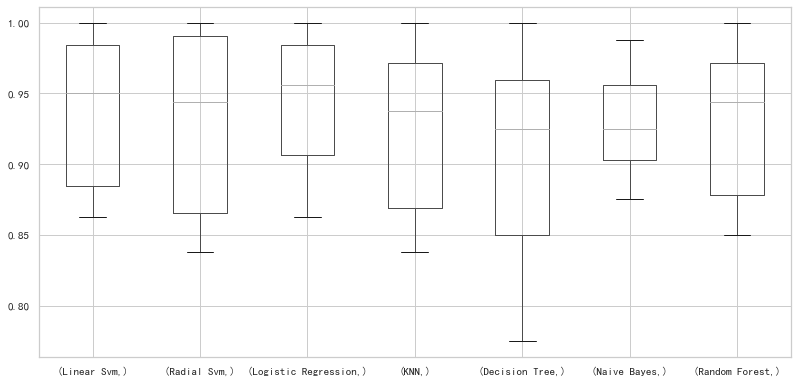

In [24]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

### 混淆矩阵

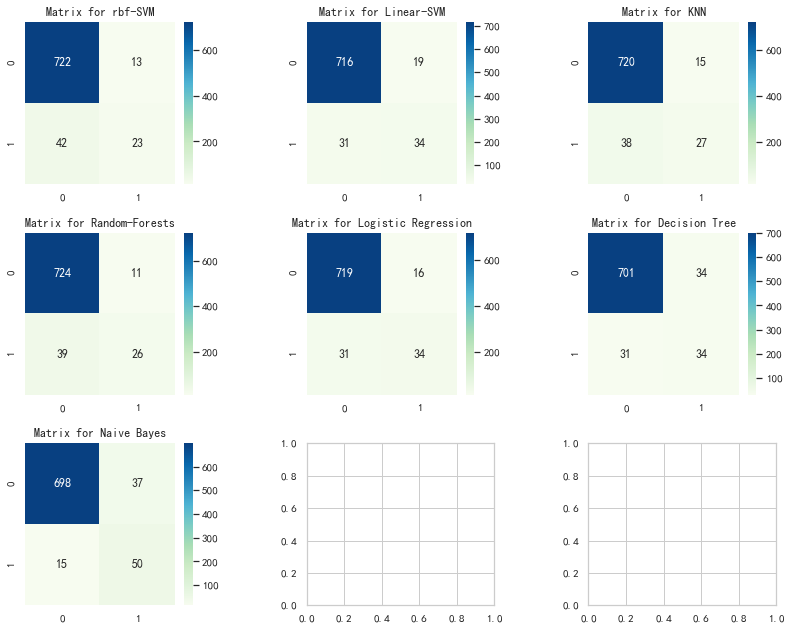

In [25]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f',cmap='GnBu')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f',cmap='GnBu')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f',cmap='GnBu')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f',cmap='GnBu')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f',cmap='GnBu')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f',cmap='GnBu')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f',cmap='GnBu')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.3,wspace=0.5)
plt.show()

## 集成算法

### 1. Voting Classifier

In [26]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.05,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=200,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',gamma=0.1,probability=True))
                                             ], voting='soft').fit(x_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(x_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.94375
The cross validated score is 0.9337500000000001


### 2. Bagging 

In [35]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
bagging.fit(x_train,y_train)
prediction=bagging.predict(x_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(bagging,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.95
The cross validated score for bagged KNN is: 0.9287500000000002


### 3. Boosting

In [28]:
#AdaBoost(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())
ada.fit(x_train,y_train)

The cross validated score for AdaBoost is: 0.93875


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=0)

In [29]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.9237500000000001


In [30]:
#XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[18:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### 混淆矩阵

[18:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

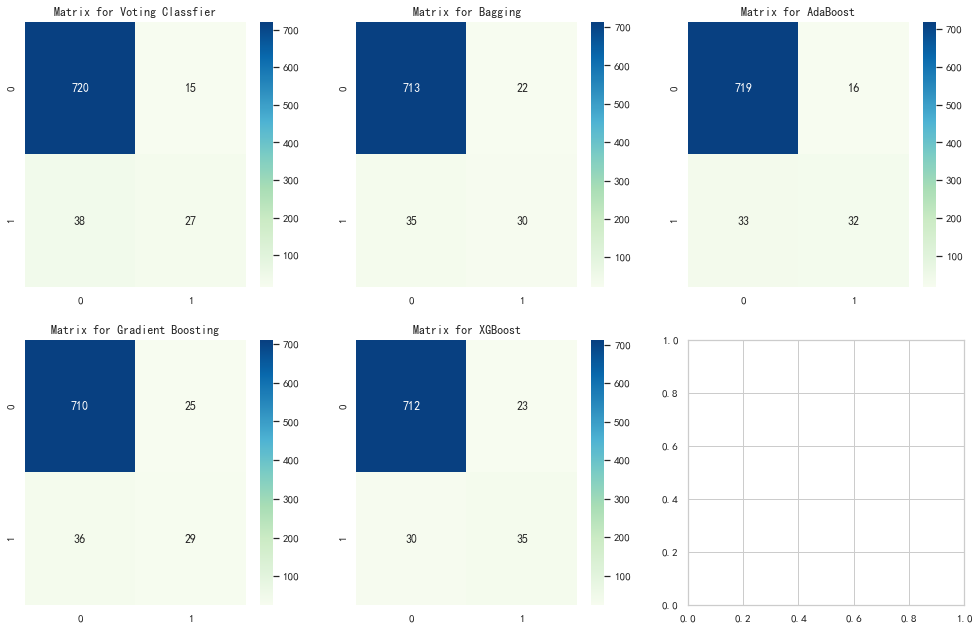

In [39]:
f,ax=plt.subplots(2,3,figsize=(15,10))
result=cross_val_predict(ensemble_lin_rbf,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='GnBu',ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Voting Classfier')
result=cross_val_predict(bagging,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='GnBu',ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Bagging')
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='GnBu',ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for AdaBoost')
result=cross_val_predict(grad,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='GnBu',ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Gradient Boosting')
result=cross_val_predict(xgboost,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='GnBu',ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for XGBoost')
plt.show()

## 特征重要性

[19:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


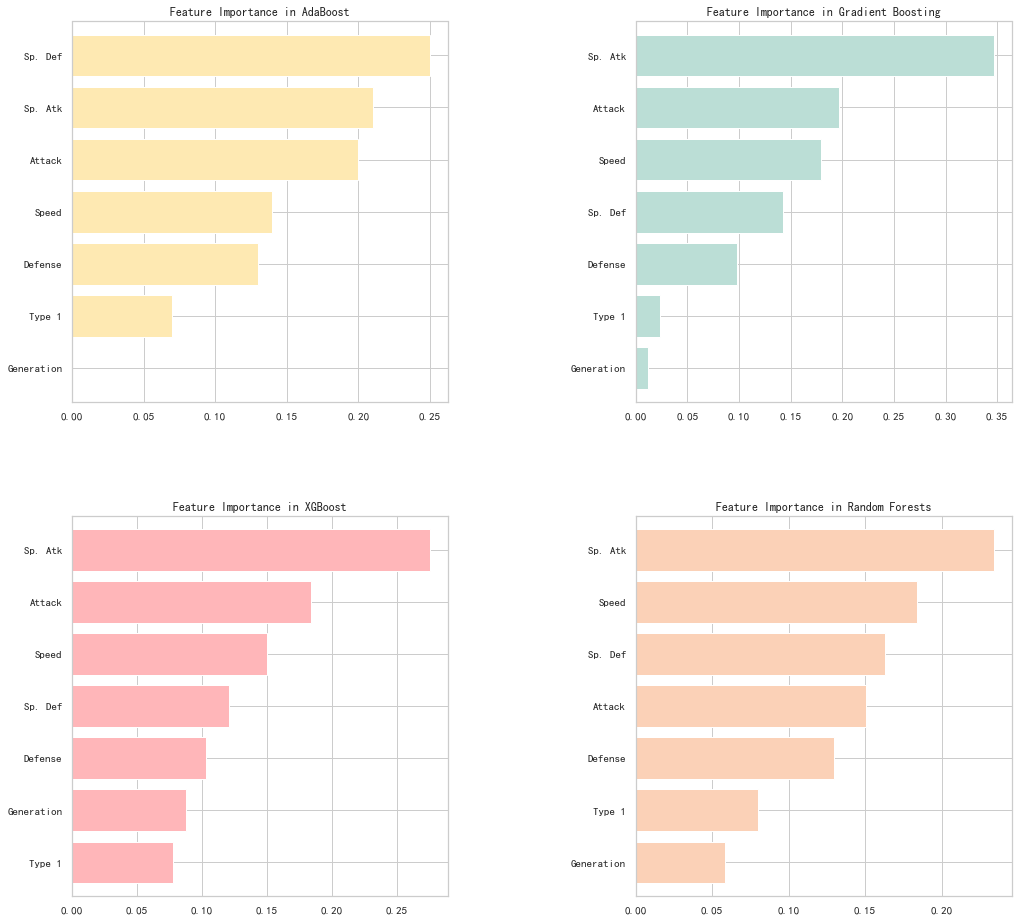

In [46]:
f,ax=plt.subplots(2,2,figsize=(15,15))
model=AdaBoostClassifier(n_estimators=100,learning_rate=0.05)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0],color=colors[1])
ax[0,0].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=0,max_depth=3)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color=colors[2])
ax[0,1].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=100,learning_rate=0.05,random_state=0,max_depth=3)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color=colors[4])
ax[1,0].set_title('Feature Importance in XGBoost')
model=RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color=colors[5])
ax[1,1].set_title('Feature Importance in Random Forests')
plt.subplots_adjust(hspace=0.3,wspace=0.5)